Male and female names have some distinctive characteristics.
Names ending in a, e, and i are likely to be female, while names ending in k, o, r, s, and
t are likely to be male. Let’s build a classifier to model these differences more precisely.

In [1]:
from nltk.corpus import names
import nltk
import random
import numpy as np

In [3]:
nltk.download('names')
names = ([(name, 'male') for name in names.words('male.txt')] + 
         [(name, 'female') for name in names.words('female.txt')])
random.shuffle(names)

[nltk_data] Downloading package names to /Users/sophiasun/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


In [5]:
names[:4]

[('Elsbeth', 'female'),
 ('Ferdinanda', 'female'),
 ('Xenia', 'female'),
 ('Sybille', 'female')]

In [6]:
def gender_features(word):
    return word[-2:] # different in lecture! 

In [95]:
gender_features("Trinity")

'ty'

In [8]:
featuresets = [({'feature': gender_features(n)}, g) for n, g in names]
train_set, test_set = featuresets[500:], featuresets[:500]

Let's train the Naive Bayes Classifier

In [97]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [98]:
classifier.prob_classify({'feature': gender_features('Esther')}).prob('female')

0.19521736188047178

Lets bring the data into `sklearn`-format. 

In [99]:
probs = [classifier.prob_classify(a).prob('female') for a, b in test_set]
#probs = [(p, 1-p) for p in probs]

In [100]:
probs[:2]

[0.5257128645397543, 0.4014486715206045]

In [101]:
labels = [1 if a == 'female' else 0 for _, a in test_set]

In [102]:
labels[:2]

[0, 0]

Now, lets plot the ROC curve. 

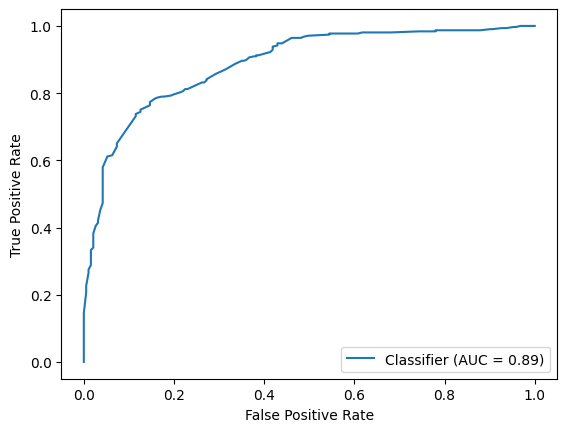

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    labels,
    probs
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)

How good is this classifier compared to other ones? What if one were to use the last three letters? 

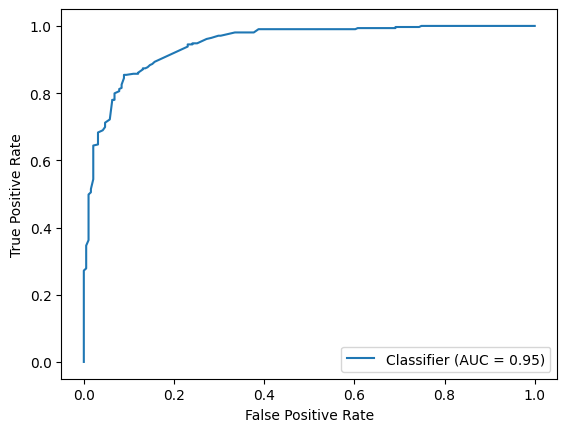

In [107]:
def gender_features(word):
    return word[-3:] 
featuresets = [({'feature': gender_features(n)}, g) for n, g in names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(featuresets)
probs = [classifier.prob_classify(a).prob('female') for a, b in test_set]
labels = [1 if a == 'female' else 0 for _, a in test_set]
display = RocCurveDisplay.from_predictions(
    labels,
    probs
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)

The first letter is useless: 

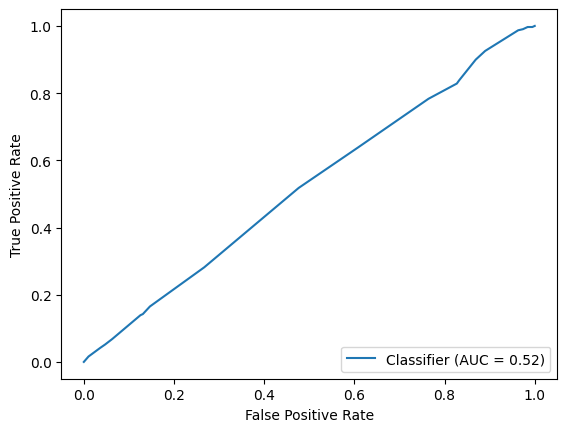

In [108]:
def gender_features(word):
    return word[1] 
featuresets = [({'feature': gender_features(n)}, g) for n, g in names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(featuresets)
probs = [classifier.prob_classify(a).prob('female') for a, b in test_set]
labels = [1 if a == 'female' else 0 for _, a in test_set]
display = RocCurveDisplay.from_predictions(
    labels,
    probs
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)

In [58]:
y_onehot_test[:, class_id]

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0])

We can also engineer multiple features. 

In [110]:
def gender_features2(name):
    features = {}
    features["firstletter"] = name[0].lower()
    features["lastletter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count(%s)" % letter] = name.lower().count(letter)
        features["has(%s)" % letter] = (letter in name.lower())
    return features

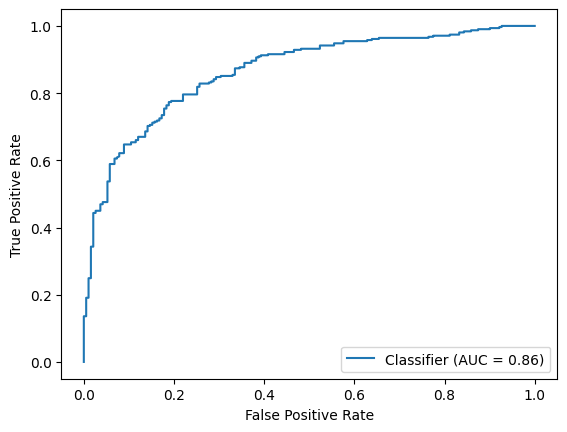

In [112]:
featuresets = [(gender_features2(n), g) for n, g in names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(featuresets)
probs = [classifier.prob_classify(a).prob('female') for a, b in test_set]
labels = [1 if a == 'female' else 0 for _, a in test_set]
display = RocCurveDisplay.from_predictions(
    labels,
    probs
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)